In [1]:
import re
import ast
import numpy as np
import math
from functools import cache, cmp_to_key
from itertools import product
from typing import Tuple

import networkx as nx

def read_file_to_string(file_path):
    with open(file_path,'r') as f:
        return f.read()
    
day_23_string = read_file_to_string('day_23_input.txt')
day_23_test = read_file_to_string('day_23_test.txt')
#day_20_test_2 = read_file_to_string('day_20_test_2.txt')
# day_20_test_3 = read_file_to_string('day_20_test_3.txt')
# day_20_test_4 = read_file_to_string('day_20_test_4.txt')
# day_20_test_5 = read_file_to_string('day_20_test_5.txt')

In [2]:
def parse_string(string):
    
    height_matrix = [tuple(list('#'+string+'#')) for string in re.split('\n', string)]
    height_matrix = [tuple(['#' for i in height_matrix[0]])] + height_matrix + [tuple(['#' for i in height_matrix[0]])]

    return tuple(height_matrix)

In [3]:
day_23_test_grid = parse_string(day_23_test)

In [4]:
print(day_23_test_grid)

(('#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'), ('#', '#', '.', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'), ('#', '#', '.', '.', '.', '.', '.', '.', '.', '#', '#', '#', '#', '#', '#', '#', '#', '#', '.', '.', '.', '#', '#', '#', '#'), ('#', '#', '#', '#', '#', '#', '#', '#', '.', '#', '#', '#', '#', '#', '#', '#', '#', '#', '.', '#', '.', '#', '#', '#', '#'), ('#', '#', '#', '#', '.', '.', '.', '.', '.', '#', '.', '>', '.', '>', '.', '#', '#', '#', '.', '#', '.', '#', '#', '#', '#'), ('#', '#', '#', '#', 'v', '#', '#', '#', '#', '#', '.', '#', 'v', '#', '.', '#', '#', '#', '.', '#', '.', '#', '#', '#', '#'), ('#', '#', '#', '#', '.', '>', '.', '.', '.', '#', '.', '#', '.', '#', '.', '.', '.', '.', '.', '#', '.', '.', '.', '#', '#'), ('#', '#', '#', '#', 'v', '#', '#', '#', '.', '#', '.', '#', '.', '#', '#', '#', '#', '#', '#', '#', '#', '#',

In [5]:
@cache
def neighbours(grid, index, came_from:Tuple=()):
    #issue, don't go right to > etc

    potential_neighbours = [(index[0]-1,index[1]),(index[0]+1,index[1]),(index[0],index[1]-1),(index[0],index[1]+1)]
    
    #0 y axis, 1 is x axis
    if grid[index[0]][index[1]] == ">":
            return [(index[0],index[1]+1)]
    
    if grid[index[0]][index[1]] == "<":
            return [(index[0],index[1]-1)]
    
    if grid[index[0]][index[1]] == "v":
            return [(index[0]+1,index[1])]
    
    if grid[index[0]][index[1]] == "^":
            return [(index[0]-1,index[1])]

    real_neighbours = []
    for neighbour in potential_neighbours:
        if neighbour not in came_from and grid[neighbour[0]][neighbour[1]] != '#':
                if grid[neighbour[0]][neighbour[1]] == '>' and neighbour == (index[0],index[1]-1):
                        continue
                elif grid[neighbour[0]][neighbour[1]] == '<' and neighbour == (index[0],index[1]+1):
                        continue
                elif grid[neighbour[0]][neighbour[1]] == 'v' and neighbour == (index[0]-1,index[1]):
                        continue
                elif grid[neighbour[0]][neighbour[1]] == '^' and neighbour == (index[0]+1,index[1]):
                        continue
                real_neighbours.append(neighbour)

    return real_neighbours

In [6]:
def traverse_grid(grid, start,end,start_path=()):

    #print(start)

    path = [start]
    paths = []
    if start_path == ():
        start_path = (start,)
    else:
        start_path += start
    

    for i, point in enumerate(path):

        if point == end:
            paths.append(path)
            break

        if len(path) >= 2:
            #print(path[-2])
            nbs = neighbours(grid,point,came_from=start_path+tuple(path))
        else:
            nbs = neighbours(grid,point,came_from=start_path+tuple(path))
        
        if len(nbs) == 1:
            path.append(nbs[0])



        if len(nbs) >= 2:

            for neighbour in nbs:
                for path_n in traverse_grid(grid, neighbour, end, tuple(path)):
                    paths.append(path + path_n)

    return paths

In [7]:
def make_graph(grid, start, end, current_graph=None,start_path=()):

    if current_graph == None:
        G = nx.DiGraph()
        G.add_node(start)
    else:
        G = current_graph

    #print(start)

    start_nbs = neighbours(grid,start)
    #print(start_nbs)
    
    for st_nb in start_nbs:
        #print(st_nb)
        path = [st_nb]

        if start_path == ():
            start_path = (start,st_nb)
        else:
            start_path += start
            start_path += st_nb

        for i, point in enumerate(path):

            

            if len(path) >= 2:
                #print(path[-2])
                nbs = neighbours(grid,point,came_from=start_path+tuple(path))
            else:
                nbs = neighbours(grid,point,came_from=start_path+tuple(path))

            if len(nbs) == 0:
                break
            
            if len(nbs) == 1:
                path.append(nbs[0])
                if nbs[0] == end:
                    G.add_node(end)
                    G.add_edge(start,end,weight=len(path))
                    continue


            if len(nbs) >= 2:

                if not G.has_node(point):
                    G.add_node(point)


                #print(G.degree(point),len(nbs))
                if G.degree(point) < len(nbs)+1: 
                    G.add_edge(start,point,weight=len(path))
                    nx.disjoint_union(G, make_graph(grid, point, end,current_graph=G,start_path=tuple(path)))
    return G

In [8]:
def part_one(grid, start, end):
    paths = traverse_grid(grid, start,end,start_path = ())
    path_lengths = [len(path)-1 for path in paths]

    return max(path_lengths)

In [9]:
part_one(day_23_test_grid, (1,2),(23,22))

94

In [10]:
day_23_input_grid = parse_string(day_23_string)

part_one(day_23_input_grid,(1,2),(141,140))

2050

In [8]:
def part_one_2(grid, start, end):

    G = make_graph(grid,start,end)
    nx.draw(G)

    # spanning_tree = nx.dfs_tree(G)

    # for u, v in spanning_tree.edges():
    #     spanning_tree[u][v]['weight'] = G[u][v]['weight']

    longest_path_tree = nx.dag_longest_path_length(G,weight='weight')

    return longest_path_tree

94

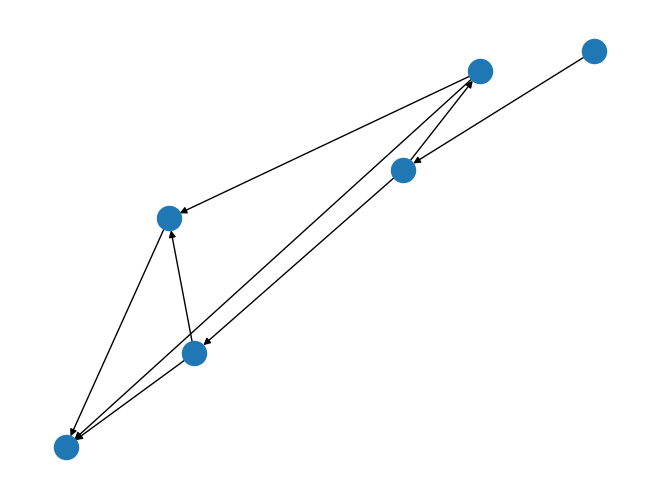

In [9]:
part_one_2(day_23_test_grid, (1,2),(23,22))

2050

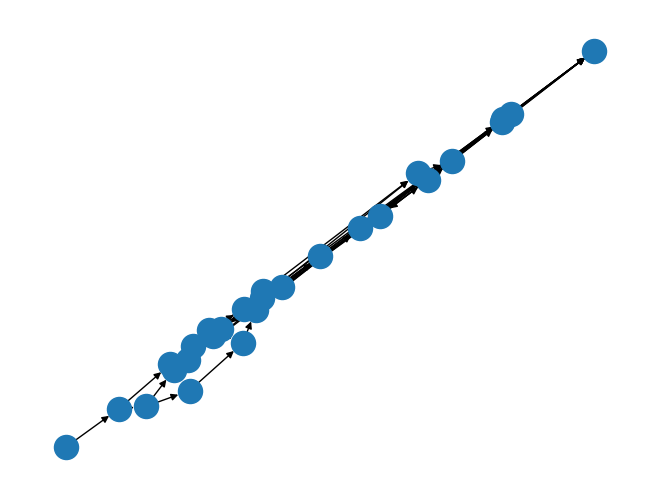

In [12]:
day_23_input_grid = parse_string(day_23_string)

part_one_2(day_23_input_grid,(1,2),(141,140))

## Part 2

In [13]:
def neighbours_2(grid, index, came_from:Tuple=()):
    #issue, don't go right to > etc

    potential_neighbours = [(index[0]-1,index[1]),(index[0]+1,index[1]),(index[0],index[1]-1),(index[0],index[1]+1)]
    
    real_neighbours = []
    for neighbour in potential_neighbours:
        #print(neighbour)
        if neighbour not in came_from and grid[neighbour[0]][neighbour[1]] != '#':
            real_neighbours.append(neighbour)

    return real_neighbours

In [18]:
def make_graph_2(grid, start, end, current_graph=None,start_path=()):

    if current_graph == None:
        G = nx.DiGraph()
        G.add_node(start)
    else:
        G = current_graph

    #print(start)

    start_nbs = neighbours_2(grid,start)
    #print(start_nbs)
    
    for st_nb in start_nbs:
        #print(st_nb)
        path = [st_nb]

        if start_path == ():
            start_path = (start,st_nb)
        else:
            start_path += start
            start_path += st_nb

        for i, point in enumerate(path):

            if len(path) >= 2:
                #print(path[-2])
                nbs = neighbours_2(grid,point,came_from=start_path+tuple(path))
            else:
                nbs = neighbours_2(grid,point,came_from=start_path+tuple(path))
            
            if len(nbs) == 1:
                path.append(nbs[0])
                if nbs[0] == end:
                    G.add_node(end)
                    G.add_edge(start,end,weight=len(path))
                    continue


            if len(nbs) >= 2:

                if not G.has_node(point):
                    G.add_node(point)


                #print(G.degree(point),len(nbs))
                if G.degree(point) < 2*(len(nbs)+1): 
                    G.add_edge(start,point,weight=len(path))
                    G.add_edge(point,start,weight=len(path))
                    nx.disjoint_union(G, make_graph_2(grid, point, end,current_graph=G,start_path=tuple(path)))
    return G

In [19]:
G = make_graph_2(day_23_test_grid,(1,1),(23,22))

In [26]:
def part_two(grid, start, end):

    G = make_graph_2(grid,start,end)
    nx.draw(G)

    spanning_tree = nx.dfs_tree(G)

    for u, v in spanning_tree.edges():
        spanning_tree[u][v]['weight'] = G[u][v]['weight']


    print(nx.dag_longest_path(spanning_tree,weight='weight'))
    print(nx.dag_longest_path(spanning_tree))
    longest_path_tree = nx.dag_longest_path_length(spanning_tree,weight='weight')

    return longest_path_tree-1

[(1, 1), (6, 4), (14, 6), (20, 14), (14, 14), (4, 12), (12, 22), (20, 20), (23, 22)]
[(1, 1), (6, 4), (14, 6), (20, 14), (14, 14), (4, 12), (12, 22), (20, 20), (23, 22)]


154

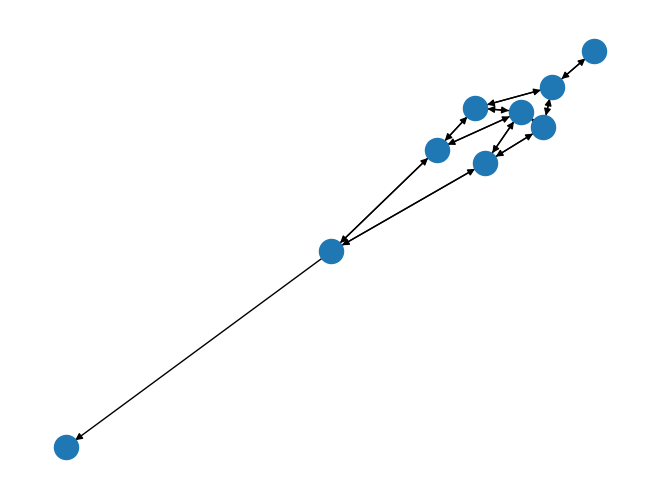

In [27]:
part_two(day_23_test_grid,(1,1),(23,22))

[(1, 1), (6, 6), (30, 10), (58, 12), (80, 10), (108, 8), (132, 40), (110, 40), (90, 38), (62, 32), (34, 34), (8, 32), (14, 64), (34, 62), (64, 58), (84, 56), (112, 58), (124, 60), (136, 86), (102, 80), (76, 80), (66, 80), (38, 84), (6, 82), (8, 108), (44, 110), (68, 104), (86, 106), (110, 104), (138, 108), (138, 136), (100, 124), (76, 130), (56, 130), (32, 134)]
[(1, 1), (6, 6), (30, 10), (58, 12), (80, 10), (108, 8), (132, 40), (110, 40), (90, 38), (62, 32), (34, 34), (8, 32), (14, 64), (34, 62), (64, 58), (84, 56), (112, 58), (124, 60), (136, 86), (102, 80), (76, 80), (66, 80), (38, 84), (6, 82), (8, 108), (44, 110), (68, 104), (86, 106), (110, 104), (138, 108), (138, 136), (100, 124), (76, 130), (56, 130), (32, 134)]


5471

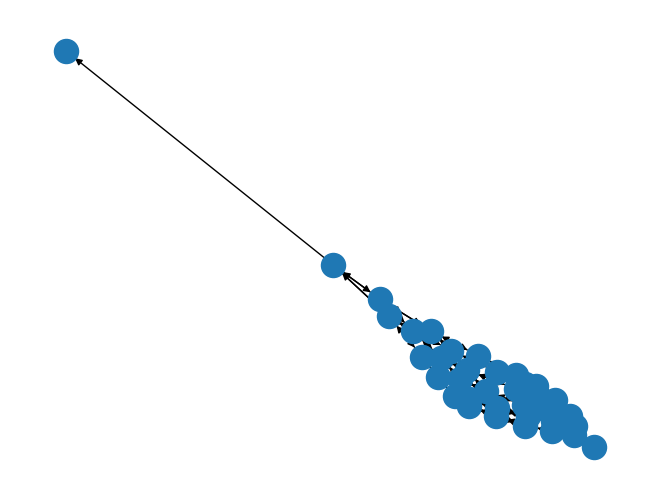

In [28]:
part_two(day_23_input_grid,(1,1),(141,140))

In [37]:
test_G = make_graph_2(day_23_test_grid,(1,1),(23,22))

simple_paths = nx.all_simple_paths(test_G, source=(1,1),target=(23,22))
#print(len(simple_paths))

max_weight = 0
for path in simple_paths:
    #print(path)
    path_weight = sum(test_G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))
    if path_weight > max_weight:
        print(path_weight)
    max_weight = max(max_weight, path_weight)
    #print(f"Weight of path {path}: {path_weight}")

print(max_weight)

155
155


In [34]:
input_G = make_graph_2(day_23_input_grid,(1,1),(141,140))

simple_paths = nx.all_simple_paths(input_G, source=(1,1),target=(141,140))
#print(simple_paths)

max_weight = 0
for path in simple_paths:
    #print(path)
    path_weight = sum(input_G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))
    if path_weight > max_weight:
        print(path_weight)
    max_weight = max(max_weight, path_weight)
    #print(f"Weight of path {path}: {path_weight}")

print(max_weight)

4639
4755
4851
5019
5039
5107
5159
5283
5307
5371
5411
5435
5459
5507
5539
5563
5587
5627
5679
5723
5863
5907
5911
5999
6091
6155
6263


KeyboardInterrupt: 

In [ ]:
#6263 too high! Ah we probably want to take 1 away

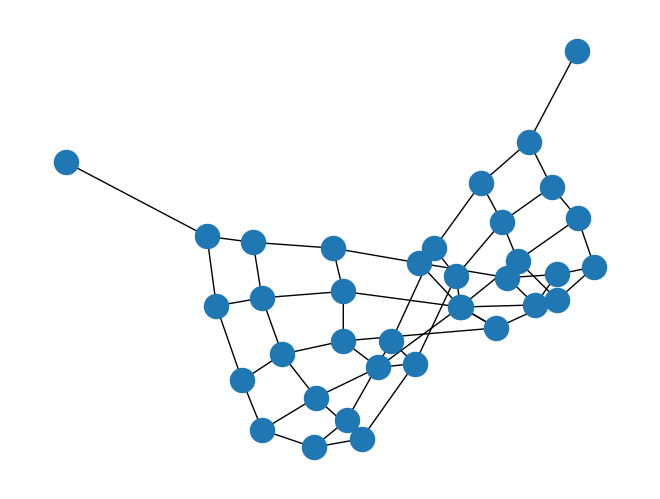

In [33]:
nx.draw(input_G)

In [ ]:
#5471 is too low

In [37]:
#this should be 3
G.degree((6,4))

3

In [24]:
len(G.edges((1, 1)))

1

In [ ]:
#need to check if a node is in as many edges as neighbours

In [20]:
G.nodes

NodeView(((1, 1), (6, 4), (14, 6), (20, 14), (14, 14), (4, 12), (12, 22), (20, 20), (23, 22)))

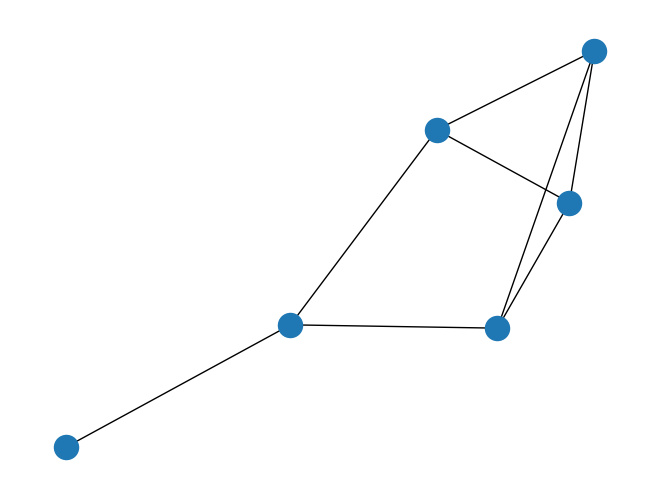

In [91]:
#!pip install matplotlib
#import matplotlib.pyplot as plt
nx.draw(G)

In [48]:
for edge in G.edges():
    weight = G.get_edge_data(*edge).get('weight', 1)
    print(f"Weight of edge {edge}: {weight}")

Weight of edge ((1, 1), (6, 4)): 16
Weight of edge ((6, 4), (14, 6)): 22
Weight of edge ((6, 4), (4, 12)): 22
Weight of edge ((14, 6), (20, 14)): 38
Weight of edge ((14, 6), (14, 14)): 12
Weight of edge ((20, 14), (14, 14)): 10
Weight of edge ((20, 14), (20, 20)): 10
Weight of edge ((14, 14), (4, 12)): 24
Weight of edge ((14, 14), (12, 22)): 18
Weight of edge ((4, 12), (12, 22)): 30
Weight of edge ((12, 22), (20, 20)): 10
Weight of edge ((20, 20), (23, 22)): 5


In [51]:
spanning_tree = nx.dfs_tree(G)

for u, v in spanning_tree.edges():
    spanning_tree[u][v]['weight'] = G[u][v]['weight']

longest_path_tree = nx.dag_longest_path_length(spanning_tree,weight='weight')

In [52]:
longest_path_tree

155

In [43]:
DiG = nx.DiGraph(G)
longest_path = nx.dag_longest_path(DiG)

NetworkXUnfeasible: Graph contains a cycle or graph changed during iteration

In [42]:
for path in nx.all_simple_paths(G,(1, 1),(23, 22)):
    print(path)

[(1, 1), (6, 4), (14, 6), (20, 14), (14, 14), (4, 12), (12, 22), (20, 20), (23, 22)]
[(1, 1), (6, 4), (14, 6), (20, 14), (14, 14), (12, 22), (20, 20), (23, 22)]
[(1, 1), (6, 4), (14, 6), (20, 14), (20, 20), (23, 22)]
[(1, 1), (6, 4), (14, 6), (14, 14), (20, 14), (20, 20), (23, 22)]
[(1, 1), (6, 4), (14, 6), (14, 14), (4, 12), (12, 22), (20, 20), (23, 22)]
[(1, 1), (6, 4), (14, 6), (14, 14), (12, 22), (20, 20), (23, 22)]
[(1, 1), (6, 4), (4, 12), (14, 14), (20, 14), (20, 20), (23, 22)]
[(1, 1), (6, 4), (4, 12), (14, 14), (14, 6), (20, 14), (20, 20), (23, 22)]
[(1, 1), (6, 4), (4, 12), (14, 14), (12, 22), (20, 20), (23, 22)]
[(1, 1), (6, 4), (4, 12), (12, 22), (20, 20), (23, 22)]
[(1, 1), (6, 4), (4, 12), (12, 22), (14, 14), (20, 14), (20, 20), (23, 22)]
[(1, 1), (6, 4), (4, 12), (12, 22), (14, 14), (14, 6), (20, 14), (20, 20), (23, 22)]


In [22]:
G.edges

EdgeView([((1, 1), (6, 4)), ((6, 4), (14, 6)), ((14, 6), (20, 14)), ((20, 14), (14, 14)), ((14, 14), (4, 12)), ((4, 12), (12, 22)), ((12, 22), (20, 20)), ((20, 20), (23, 22))])

In [39]:
nx.dag_longest_path_length(G)

NetworkXNotImplemented: not implemented for undirected type